In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs

In [2]:
data=pd.read_csv('corona_tested_individuals.csv')

c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
encoder = preprocessing.LabelEncoder()


In [4]:
data=data.drop(['test_date'],axis=1)

In [5]:
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,No,male,Other
1,0,1,0,0,0,negative,No,male,Other
2,0,0,0,0,0,negative,Yes,female,Other
3,0,0,0,0,0,negative,No,male,Other
4,0,1,0,0,0,negative,No,male,Contact with confirmed


In [6]:
data['cough'] = encoder.fit_transform(data['cough'].astype(str))

In [7]:
data['fever'] = encoder.fit_transform(data['fever'].astype(str))
data['sore_throat'] = encoder.fit_transform(data['sore_throat'].astype(str))
data['shortness_of_breath'] = encoder.fit_transform(data['shortness_of_breath'].astype(str))


In [8]:
data.isna().sum()

cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [9]:
data=data.dropna()
data.isna().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [10]:
data['head_ache'] = encoder.fit_transform(data['head_ache'].astype(str))
data['gender'].replace({'male':1, 'female':0}, inplace=True)
data['age_60_and_above'].replace({'Yes':1,'No':0}, inplace=True)
data['corona_result'].replace({'positive':1, 'negative':0}, inplace=True)


data['corona_result'] = encoder.fit_transform(data['corona_result'].astype(str))
data['age_60_and_above'] = encoder.fit_transform(data['age_60_and_above'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))


In [11]:
data.dtypes

cough                   int32
fever                   int32
sore_throat             int32
shortness_of_breath     int32
head_ache               int32
corona_result           int32
age_60_and_above        int32
gender                  int32
test_indication        object
dtype: object

In [12]:
data=data.drop(['test_indication'],axis=1)
data.dtypes

cough                  int32
fever                  int32
sore_throat            int32
shortness_of_breath    int32
head_ache              int32
corona_result          int32
age_60_and_above       int32
gender                 int32
dtype: object

In [13]:
data.head()



,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [14]:
data.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
2731639,1,1,1,1,1,1,0,0
2731640,0,0,0,0,0,0,0,0
2731643,1,0,0,0,0,0,0,1
2731644,0,0,0,0,0,0,0,0
2731647,0,0,0,0,0,0,0,0


In [15]:
X = data[['cough','fever','sore_throat','shortness_of_breath','head_ache','age_60_and_above','gender']]

In [16]:
Y = data['corona_result']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [18]:
rf= RandomForestClassifier(n_estimators=50, random_state=1)
rf.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=50, random_state=1)

In [19]:
pred = np.array(rf.predict(X_test))

In [20]:

from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(Y_test,pred)
print(cm)

[[573523   9247      0]
 [ 41201  21521      0]
 [  9765    612      0]]


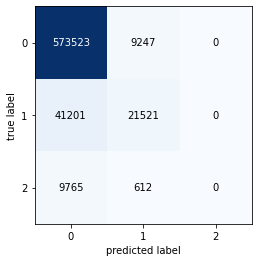

In [21]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions
plot_confusion_matrix(cm)
plt.show()

In [22]:
from sklearn.metrics import classification_report

In [23]:
target_names = ['class 0','class 1']
print(classification_report(Y_test, pred))

c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95    582770
           1       0.69      0.34      0.46     62722
           2       0.00      0.00      0.00     10377

    accuracy                           0.91    655869
   macro avg       0.53      0.44      0.47    655869
weighted avg       0.88      0.91      0.89    655869



c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\prathish\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
accuracy_score(Y_test, pred)*100

90.72604437776445

In [25]:
rf.score(X_test,Y_test)*100

90.72604437776445

In [26]:
pred

array([0, 0, 0, ..., 0, 0, 0])